# Dados

1. Curva caracteristica a vazio

In [1]:
import numpy as np

#    0. 0.5  1.   1.5  2.  2.5   3   3.5,  4.  4.5   5.  5.5   6.  6.5,  7.  7.5  8.  8.5,  9.
y = [0, 60, 120, 200, 260, 320, 380, 420, 450, 480, 520, 530, 545, 555, 560, 566, 575, 580, 585]
x = np.arange(0, 9.5, 0.5)


# 1. Criando curva caracteristica a vazio

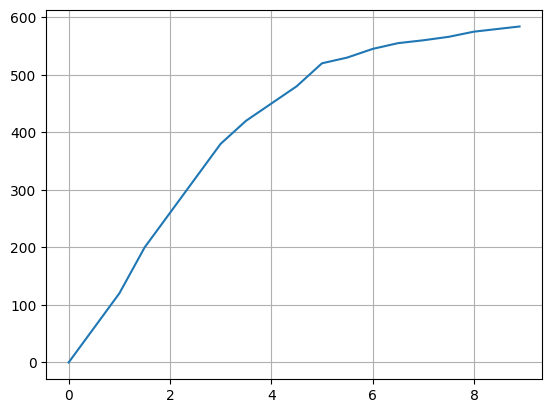

In [11]:
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt

# @brief:
def MakeCAV(x, y):
  FuncCAV = interp1d(x, y)
  Curve = FuncCAV(np.arange(0, 9, 0.1))
  plt.plot(np.arange(0, 9, 0.1), Curve)
  plt.grid()
  plt.show()
  return FuncCAV

FuncCAV = MakeCAV(x, y)

## 2. Criando diagrama fasorial

In [75]:
import cmath
import math
colors = ['black', 'green', 'blue', 'orange', 'red']

# Converte um fasor para coordenadas cartesianas
def ToCartesian(phasor):
    R = abs(phasor)
    theta = cmath.phase(phasor)
    x = R * np.cos(theta)
    y = R * np.sin(theta)
    return np.array([x, y])


# Computa a soma de uma sequência de vetores e converte em componentes plotáveis
def ComputeVectorSum(Vectors):
    origin = np.array([0.0, 0.0])
    array = []

    for i, vector in enumerate(Vectors):
        array.append([origin[0], origin[1], vector[0], vector[1]])
        if i >= 2:
            origin += vector

    array = np.array(array)

    X, Y, U, V = zip(*array)
    return (X, Y, U, V)

# Configura eixos do grafico
def ConfAxs(ax, X, Y, U, V, title, zoom):
    max_limit = max(max(np.abs(np.array(U) + np.array(X))), max(np.abs(np.array(V) + np.array(Y))), 10)
    zoom = (zoom * max_limit)
    ax.set_xlim([(-max_limit - zoom)* 0.1 , max_limit + zoom])
    ax.set_ylim([(-max_limit - zoom), max_limit + zoom])

    ax.axhline(0, color='black', linewidth=0.5)
    ax.axvline(0, color='black', linewidth=0.5)

    ax.set_xlabel('Eixo X')
    ax.set_ylabel('Eixo Y')
    ax.set_title(title)
    ax.grid(True)


def PlotVectorSum(Vectors, title, ax, zoom):
    labels = ["${I_A}$", "${E_A}$", "$V_\\phi$", "$R_A I_A$", "$jX_s I_A$"]
    for i, simetric in enumerate(Vectors):
        X, Y, U, V = ComputeVectorSum(simetric)
        for j in range(len(X)):
            text_x = X[j] + U[j] * 0.5
            text_y = (Y[j] + V[j]) / 2 - 45

            ax.text(text_x, text_y, labels[j], fontsize=10, backgroundcolor="white", color=colors[j])

            ax.quiver(X[j], Y[j], U[j], V[j],
                      angles='xy',
                      scale_units='xy',
                      color=colors[j],
                      ls="solid", scale=1, linewidth=0.05, edgecolor='black', width=0.004)
    ConfAxs(ax, X, Y, U, V,  title, zoom)

def GetIfEquivalente(Ea):
  IfVec = np.arange(0, 9, 0.1)
  EaVec = FuncCAV(IfVec)
  FuncCAVInv = interp1d(EaVec, IfVec)
  If = FuncCAVInv(abs(Ea))

  plt.xlabel("${I_f}$")
  plt.ylabel("${E_A}$")
  plt.title("Curva caracteristica a vazio")
  plt.annotate(f"({np.round(abs(Ea))}, {np.round(If, 3)})", (If + 0.5, abs(Ea) + 0.5), color="blue")
  plt.plot(IfVec, EaVec, color="blue")
  plt.plot(If, abs(Ea), 'bo')
  plt.grid()
  plt.show()

def PlotSimetricComponents(Vphi, Ia, Zeq, zoom):
    title = f"Diagrama fasorial"
    fig, ax = plt.subplots(1, 1, figsize=(15, 10))

    Ea = Vphi + Zeq * Ia

    PlotVectorSum(
        Vectors=[[ToCartesian(Ia), ToCartesian(Ea), ToCartesian(Vphi),
                ToCartesian(Ia * Zeq.real), ToCartesian(Ia * Zeq.imag * 1j)],
        ],
        title=title,
        ax=ax,
        zoom= zoom
    )

    plt.show()
    GetIfEquivalente(Ea)

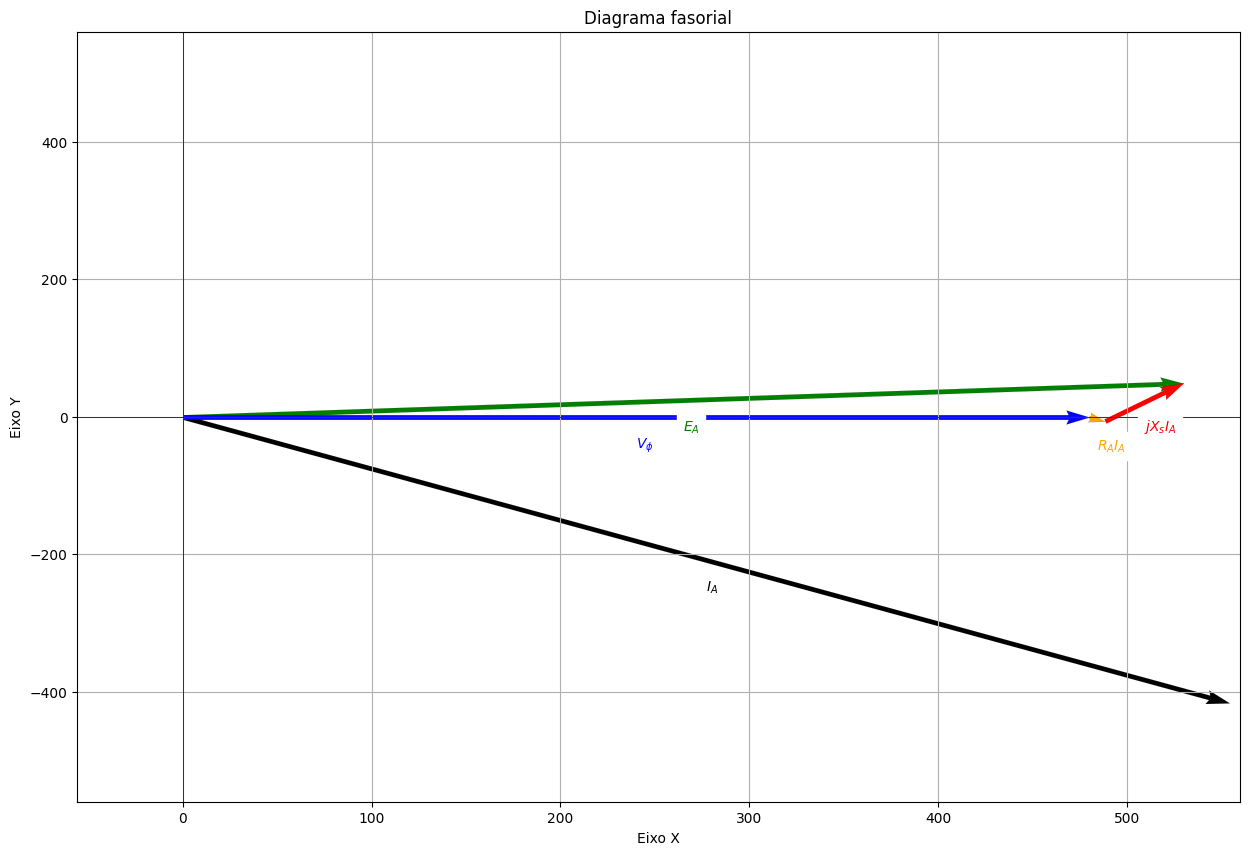

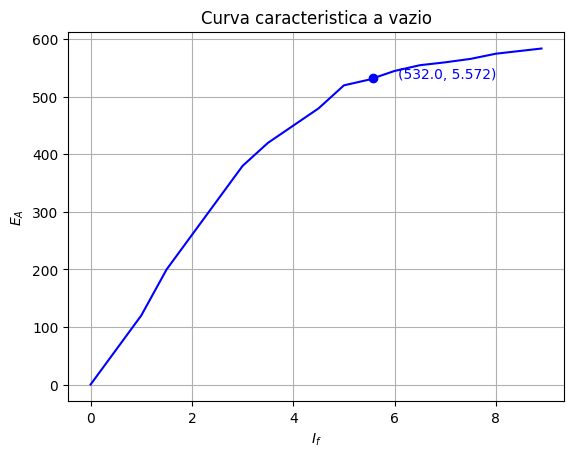

In [77]:
PlotSimetricComponents(Vphi = (480 + 0j),
                       Ia = (554.238 - 415.680j),
                       Zeq = (0.015 + 0.1j),
                       zoom=0.01)